**In-class activity N°1**

Group 2:

* Andrea Franco
* Andres Salguero
* Harpreet Kaur

# Netflix Userbase Dataset

The data-driven company we choose to work with is Netflix, taking the dataset called "Netflix Userbase Dataset" which contains information of various aspects of user like subscriptions, revenue, account details, and activity.

The dataset does not reflect actual Netflix user data but it can be used for analysis and modeling of user trends.

Source: https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset?resource=download

**Question:** What is the archetype of someone who would pay the highest subscription level and give Netflix the highest revenue?

**Why?** This question will tackle the problem of analyzing data to get valuable insights and create an effective marketing strategy so Netflix can focus its campaigns on the customers that give them a higher revenue, knowing its characteristics. As this dataset contains information about Netflix's users, it's a good opportunity to characterize the type of customer that would give Netflix the highest revenue.

**Other relevant questions:**

* What is the gender that would pay the highest subscription level?
* Which country is the one with most of the users that would pay the highest subscription level?
* What is the age of the users that would pay the highest subscription level?


In [32]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.patches as patches

In [33]:
# Load the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/afscomercial/big-data-fundamental/main/netflix.csv')
dataset.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


# Dataset Characterization

## Features description

* **User ID:** is  a unique identifier for the user

* **Subscription Type:**  it is the type of subscription wanted by the  user(Basic, Premium, Standard)

* **Monthly Revenue**: Revenue generated during the month per user

* **Join Date:** the date the user joined the  Netflix

* **Last Payment Date:** the end date of the payment by the user

* **Country:** the name of the user's country

* **Age:** the age of the user

* **Gender:** the gender of the user (male, female)

* **Device:** the device on which it is being used by the user (Smartphone, Tablet Laptop, Smart TV)

* **Plan Duration:** the duration of the plan


Number of observations and features:

There are 2500 observations, each corresponding to a different user

In [34]:
# Access the shape values. 0 index for rows and index 1 for columns
print(f'Number of observations: {dataset.shape[0]}')
print(f'Number of features: {dataset.shape[1]}')

Number of observations: 2500
Number of features: 10


Types of data and number of each kind:

There are 2 types of data: integers and object type (containing dates and strings)

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


Null values:

There are no null-values in our dataset

In [36]:
#Checking null value of the dataset
dataset.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

Columns and unique values for each one:

In [37]:
unique_values_count = dataset.nunique()
unique_values_count


User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

# Preparation Steps

To answer the questions raised, we can create different types of analisys that would help us identify this target customers, for instance:

* Histograms
* Pair plots
* Correlation index

But first, we need to preprocess the data to manipule it.

As our dataset doesn't have null-values the cleaning process will not include dropping missing values

## Dropping columns

As the "Plan Duration" feature only has 1 value for the entire dataset, in other words, all the users have a monthly suscription, the column could be dropped as it doesn't give any value for the analysis since users cannot be differentiated based on that variable.
User ID variable can also be dropped as it is irrelevant as well.

In [38]:
dataset.drop(['Plan Duration', 'User ID'], axis=1, inplace=True)
dataset.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device
0,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone
1,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV
3,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop
4,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone


## Convert the cualitative features into cuantitative

Also we need to convert the cualitative features into unique numerical values that represent each type of value inside each feature and then we can do further analysis. For this, we use the LabelEncoder from ScikitLearn library:

In [39]:
categorical_df = pd.DataFrame(dataset)

In [40]:
le = LabelEncoder()

Converting subscription Type:

In [41]:
categorical_df['Subscription Type'] = le.fit_transform(categorical_df['Subscription Type'])
label_mapping = dict(enumerate(le.classes_))
print(label_mapping)

{0: 'Basic', 1: 'Premium', 2: 'Standard'}


Country:

In [42]:
categorical_df['Country'] = le.fit_transform(categorical_df['Country'])
label_mapping = dict(enumerate(le.classes_))
print(label_mapping)

{0: 'Australia', 1: 'Brazil', 2: 'Canada', 3: 'France', 4: 'Germany', 5: 'Italy', 6: 'Mexico', 7: 'Spain', 8: 'United Kingdom', 9: 'United States'}


Gender:

In [43]:
categorical_df['Gender'] = le.fit_transform(categorical_df['Gender'])
label_mapping = dict(enumerate(le.classes_))
print(label_mapping)

{0: 'Female', 1: 'Male'}


Device:

In [44]:
categorical_df['Device'] = le.fit_transform(categorical_df['Device'])
label_mapping = dict(enumerate(le.classes_))
print(label_mapping)

{0: 'Laptop', 1: 'Smart TV', 2: 'Smartphone', 3: 'Tablet'}


# Data analysis

To gain insights from the dataset, we will conduct an analysis focusing on subscription distribution, revenue generation, user demographics, and device preferences. Some plots were created for the analysis:


*  Subscription Distribution: to understand the distribution of subscription types among the users
*   Revenue Analysis:to indicate which subscription type generates the most revenue
*   User Demographics: to show the age group and gender distribution of the users.
*   Device Preferences: to understand which devices are most popular among users.

*   Monthly Revenue by Country: to show revenue by country
*   Monthly Revenue by Age Group: to show revenue by Age
*   Monthly Revenue by Gender: to show revenue by Gender
*   Total Monthly Revenue by Age, Country:










## Statistics of the data



From the following function we can see minimum, mean and maximum values for each feature, and others.

From this we can know the mean values for numerical features as the monthly revenue, which is 12 or the average age of the users which is 38 years.


In [45]:
categorical_df.describe()

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.907600,12.508400,5.116400,38.795600,0.497200,1.500400
std,0.835788,1.686851,2.972942,7.171778,0.500092,1.125036
min,0.000000,10.000000,0.000000,26.000000,0.000000,0.000000
25%,0.000000,11.000000,2.000000,32.000000,0.000000,0.000000
50%,1.000000,12.000000,6.000000,39.000000,0.000000,2.000000
75%,2.000000,14.000000,8.000000,45.000000,1.000000,3.000000
max,2.000000,15.000000,9.000000,51.000000,1.000000,3.000000


## Continuity of Data

Analysis of the continuity of data allow us to check for gaps, jumps, and outliers in the data.

From the histograms, we can see that the data for all of the features is continuos for the stablished ranges and also see the frequency in number of users for each feature.

array([[<Axes: title={'center': 'Subscription Type'}>,
        <Axes: title={'center': 'Monthly Revenue'}>],
       [<Axes: title={'center': 'Country'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Device'}>]], dtype=object)

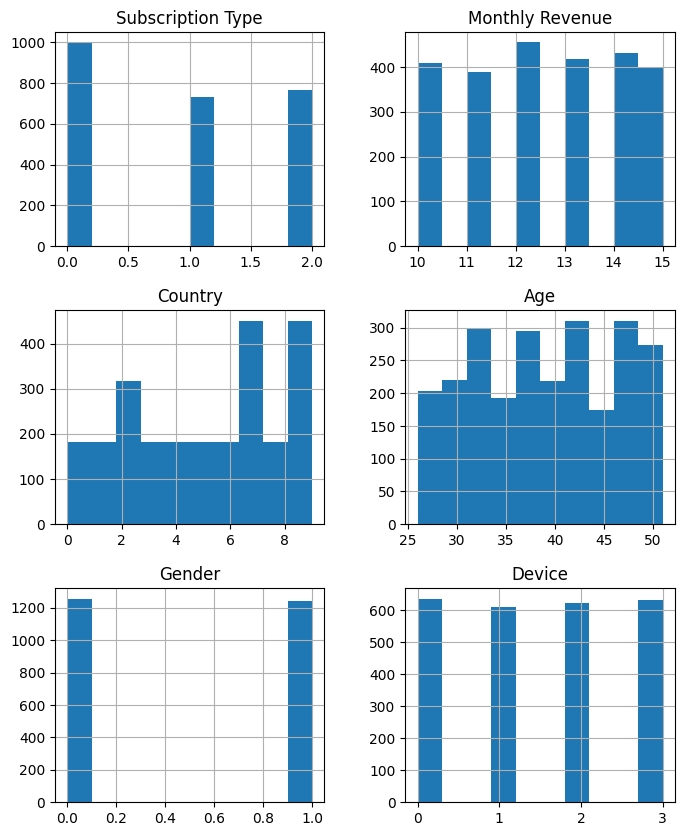

In [46]:
categorical_df.hist(figsize=(8,10))

## Signal to noise ratio

As most of the features in our dataset are categorical values, there is no need to search for a numerical signal to noise ratio. Instead, an analysis can be done to search for outliers in the data through the visualization of boxplots or histogram to visualize the frequency of the different values in the data as well.

Box plots also allow us to see the mean values for each category of data inside the features. For example, we can see from the first plot that the gender that produces the highest average monthly revenue are female users.

<Axes: xlabel='Gender', ylabel='Monthly Revenue'>

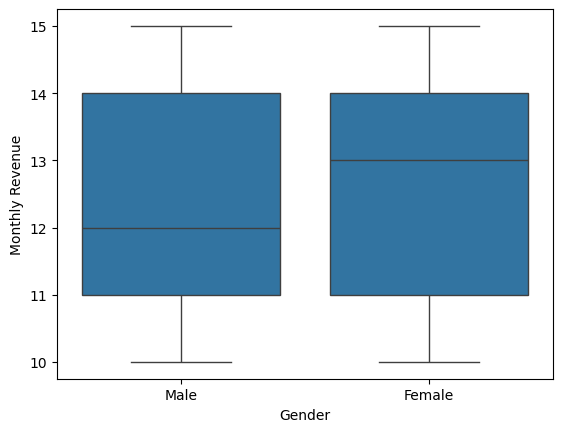

In [47]:
sns.boxplot(x='Gender', y='Monthly Revenue', data = dataset)

<Axes: xlabel='Country', ylabel='Monthly Revenue'>

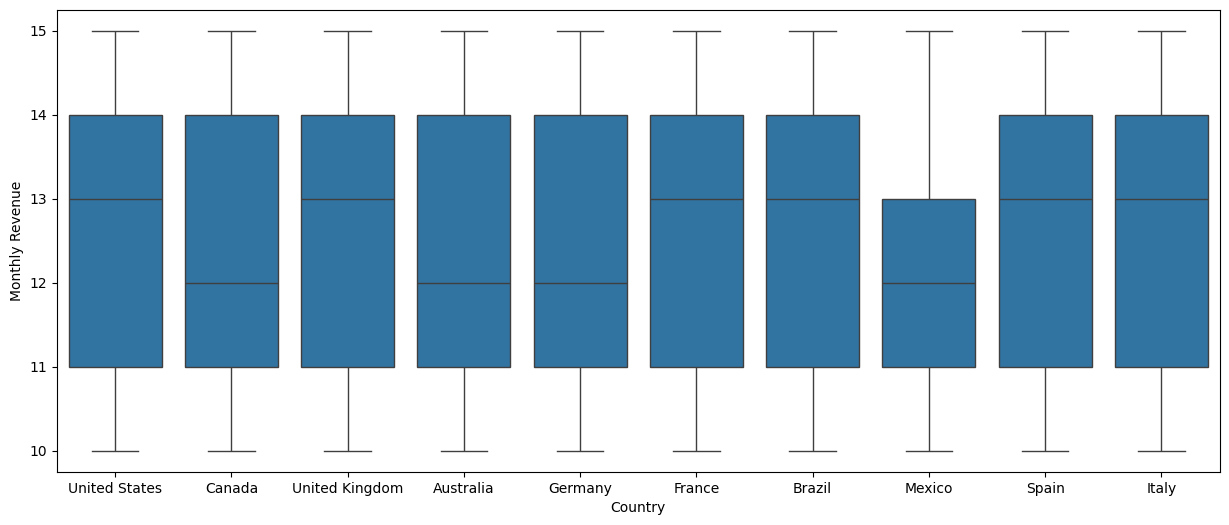

In [48]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Country', y='Monthly Revenue', data = dataset)

<Axes: xlabel='Age', ylabel='Monthly Revenue'>

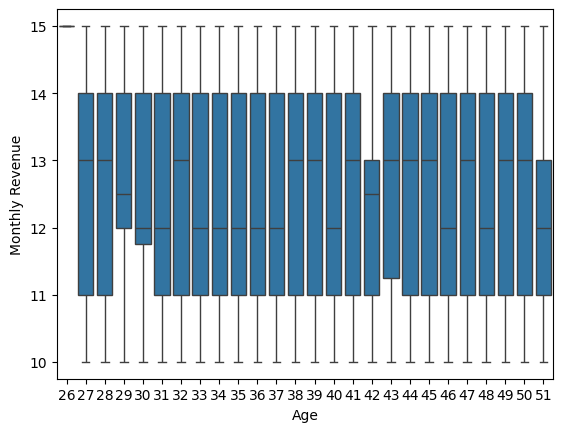

In [49]:
sns.boxplot(x='Age', y='Monthly Revenue', data = dataset)

From the previous plots, we can see that there are no outliers in our data.

## Number of dimensions of the underlying process that generated the dataset

For example, an audio file has many dimensions, but only a few muscles in our face are used to speak

Making the analogy with the audio file case, our dataset works with user data, since each observation is one single user with specific information about its netflix usage.

The underlying process that generates the data in this case would be the user registration, so once the user signs up, netflix database gets an update with the new user data. The number of dimensions this process manages consider among others:

* The registration form
* Netflix servers and infrastructure
* User's internet

# Visualizations

Next we can see different types of plots to complete our analysis.

Pair plot

This grid of plots shows the relationship between pairs of columns in our dataframe which allow us to identify the distribution of the data and potential relationship between variables.

As our data was mostly categorical, the distribution of the data is even.

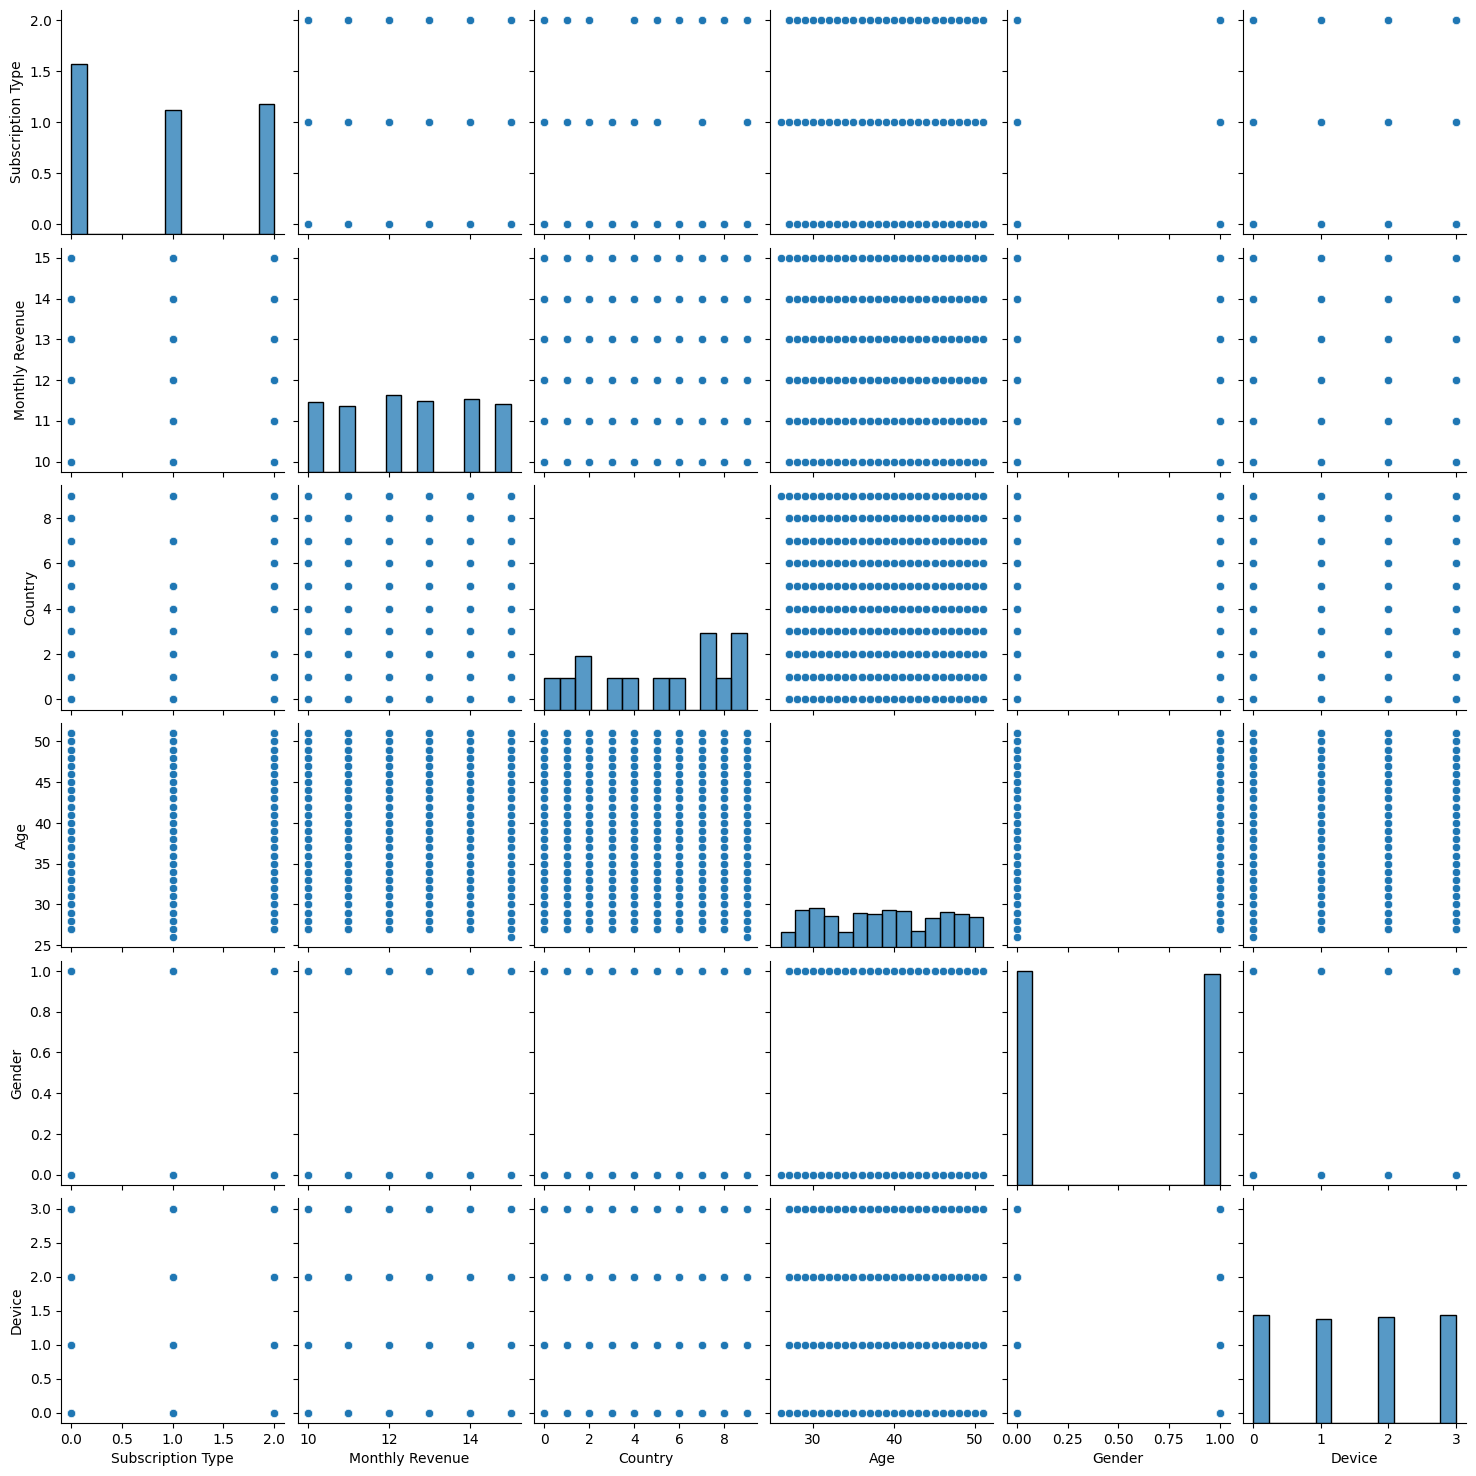

In [50]:
sns.pairplot(categorical_df)

Correlation

On the other hand, when looking for the correlation between variables we can make a heatmap to easily visualize this factor.

First we drop the dates column as they are irrelevant for a correlation analysis.

In [51]:
corr_df = categorical_df.drop(['Join Date', 'Last Payment Date'], axis=1)
corr_df.head()

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device
0,0,10,9,28,1,2
1,1,15,2,35,0,3
2,2,12,8,42,1,1
3,2,12,0,51,0,0
4,0,10,4,33,1,2


From the heatmap we can see that the features that presents the greatest correlation with our target feature is the Country, which is also one of the features with the highest variety of data.

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device
Subscription Type,1.000000,-0.001862,0.200324,0.009399,0.014220,0.015147
Monthly Revenue,-0.001862,1.000000,0.024900,-0.021143,-0.006139,-0.001899
Country,0.200324,0.024900,1.000000,0.021480,-0.004222,-0.017781
Age,0.009399,-0.021143,0.021480,1.000000,-0.039600,-0.014447
Gender,0.014220,-0.006139,-0.004222,-0.039600,1.000000,0.008537
Device,0.015147,-0.001899,-0.017781,-0.014447,0.008537,1.000000


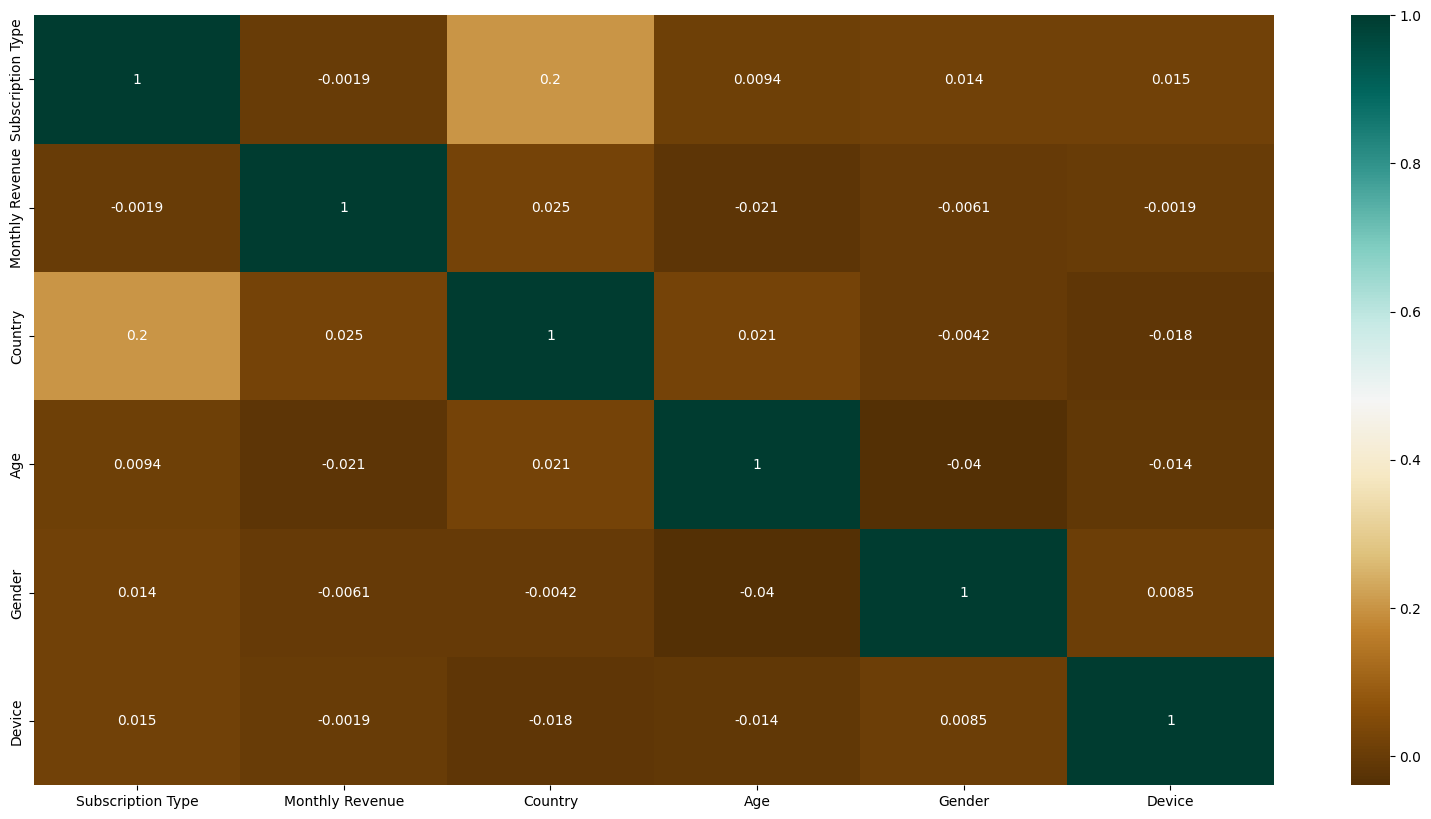

In [52]:
plt.figure(figsize=(20,10))
c = corr_df.corr()
sns.heatmap(c,cmap="BrBG", annot=True)
c

Finally, we can create histograms to compare each feature with the Monthly revenue and get to know what are the relevant characteristics of the users that generates a higher revenue to Netflix.

Although the highest type of subscription that cost the most is the premium subscription, the one that generates the highest revenue is the Basic one, this due to the amount of users that have this type of subscription as it can be seen in the next graphic.

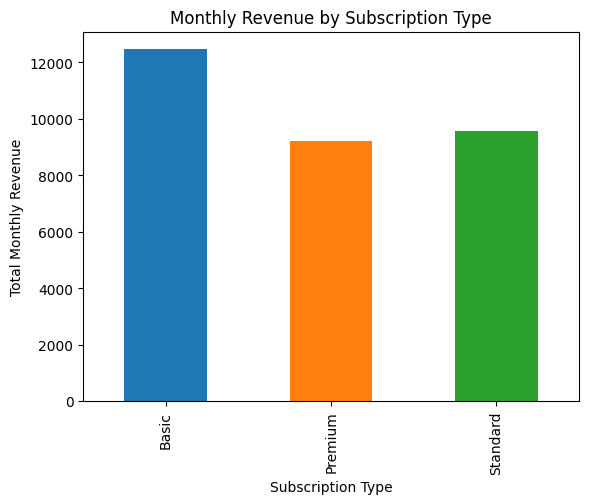

In [54]:
monthly_revenue = dataset.groupby('Subscription Type')['Monthly Revenue'].sum()
monthly_revenue.plot(kind='bar', title='Monthly Revenue by Subscription Type', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Subscription Type')
plt.ylabel('Total Monthly Revenue')
plt.show()

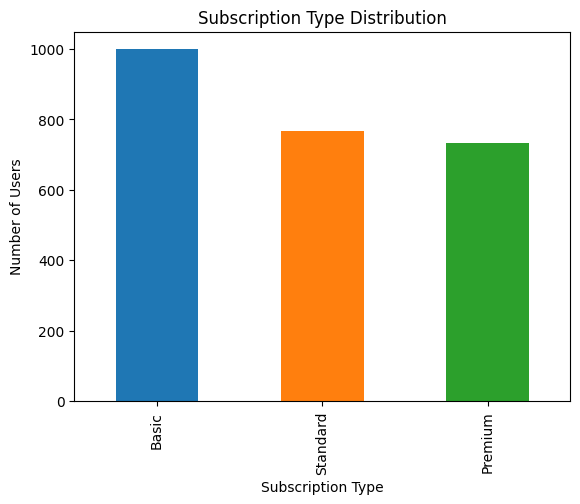

In [63]:
subscription_counts = dataset['Subscription Type'].value_counts()
subscription_counts.plot(kind='bar', title='Subscription Type Distribution', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')
plt.show()

On the other hand, the following graphs allow us to know demographic information about the users that produces a higher revenue like country, age and gender:

<ipython-input-57-f7baf1b1c7a8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_revenue, x='Monthly Revenue', y='Country', palette='viridis')


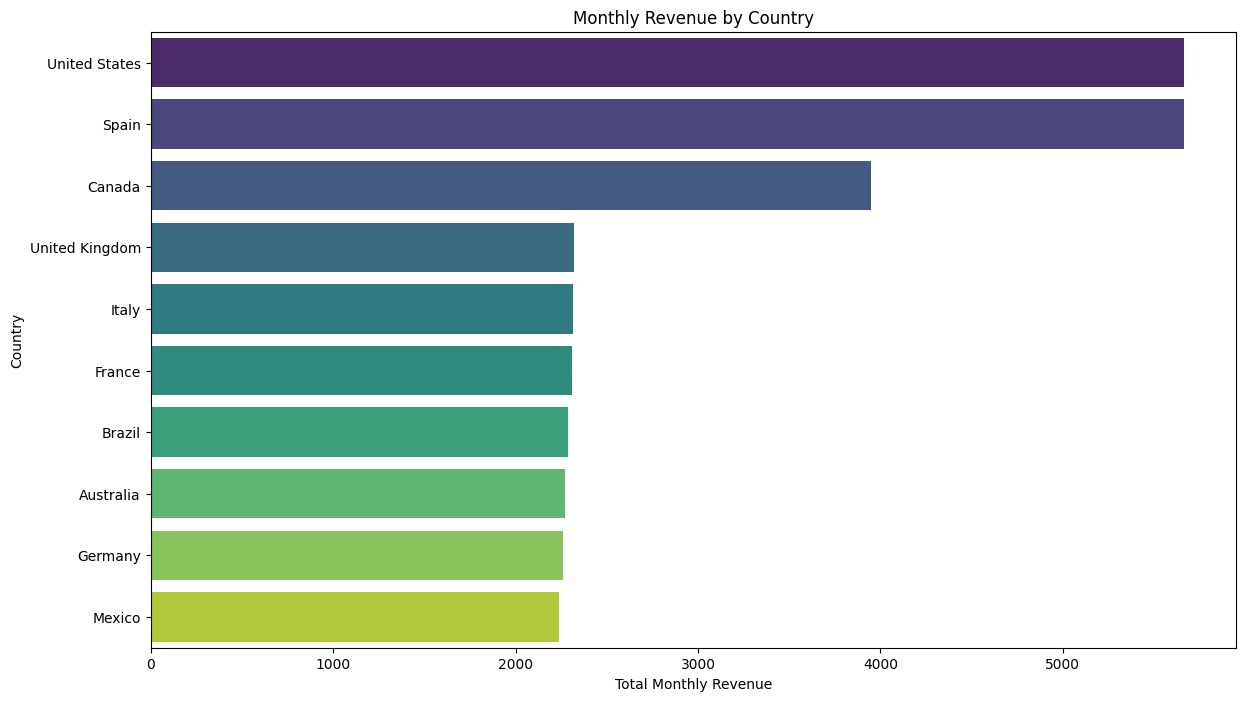

In [57]:
# Group by Country and sum the Monthly Revenue
country_revenue = dataset.groupby('Country')['Monthly Revenue'].sum().reset_index()

# Sort the data by Monthly Revenue in descending order
country_revenue = country_revenue.sort_values(by='Monthly Revenue', ascending=False)

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=country_revenue, x='Monthly Revenue', y='Country', palette='viridis')
plt.title('Monthly Revenue by Country')
plt.xlabel('Total Monthly Revenue')
plt.ylabel('Country')
plt.show()

<ipython-input-58-b5ddf972d62f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_revenue, x='Monthly Revenue', y='Age Group', palette='viridis')


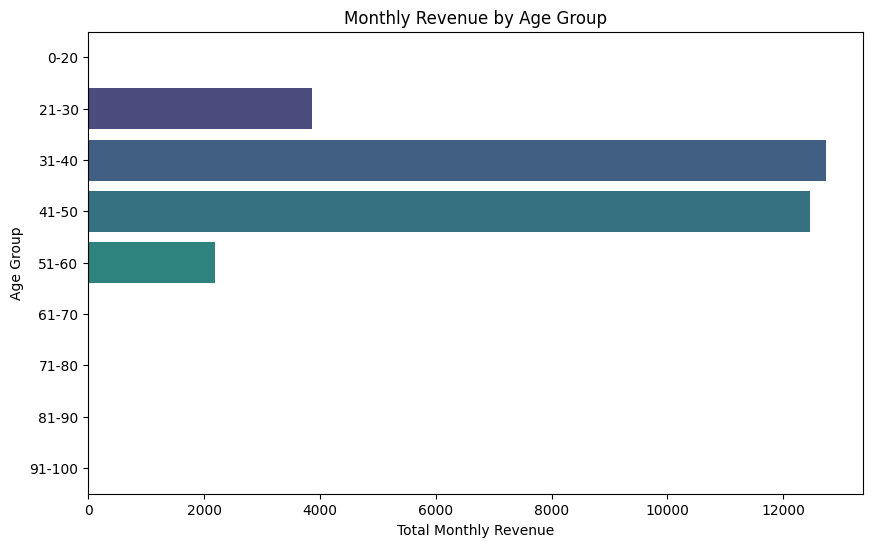

In [58]:
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Assign age groups to the dataframe
dataset['Age Group'] = pd.cut(dataset['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by Age Group and sum the Monthly Revenue
age_revenue = dataset.groupby('Age Group')['Monthly Revenue'].sum().reset_index()

# Sort the data by Monthly Revenue in descending order
age_revenue = age_revenue.sort_values(by='Monthly Revenue', ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=age_revenue, x='Monthly Revenue', y='Age Group', palette='viridis')
plt.title('Monthly Revenue by Age Group')
plt.xlabel('Total Monthly Revenue')
plt.ylabel('Age Group')
plt.show()

<ipython-input-59-d02291141ea1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_revenue, x='Monthly Revenue', y='Gender', palette='viridis')


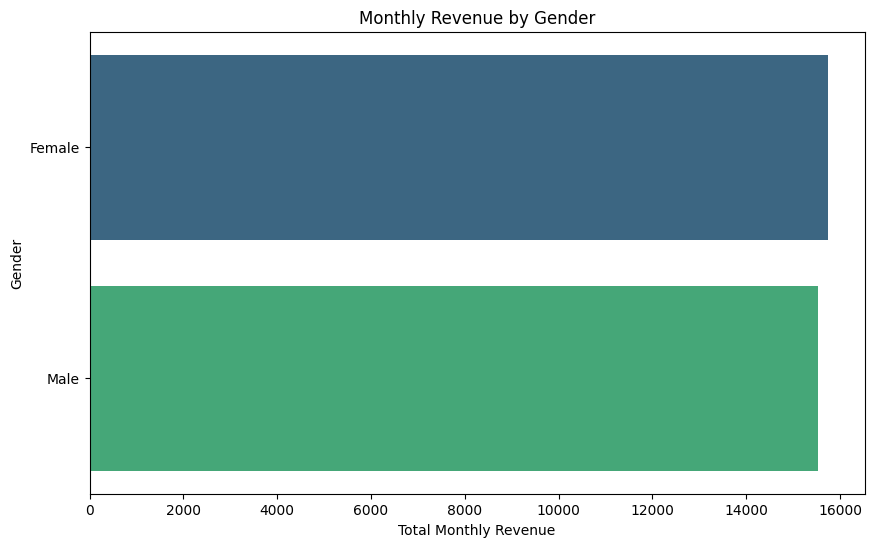

In [59]:
gender_revenue = dataset.groupby('Gender')['Monthly Revenue'].sum().reset_index()


gender_revenue = gender_revenue.sort_values(by='Monthly Revenue', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=gender_revenue, x='Monthly Revenue', y='Gender', palette='viridis')
plt.title('Monthly Revenue by Gender')
plt.xlabel('Total Monthly Revenue')
plt.ylabel('Gender')
plt.show()

We can also analyze two variables simultaneously through seaborn bar plots:

In this graph we can see that the highest total monthly revenue by age and country corresponds to people in their 30's from the United States.

<ipython-input-60-521702f7f4b5>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=revenue_by_age_country_type, x='Age', y='Monthly Revenue', hue='Country', palette='viridis', ci=None)


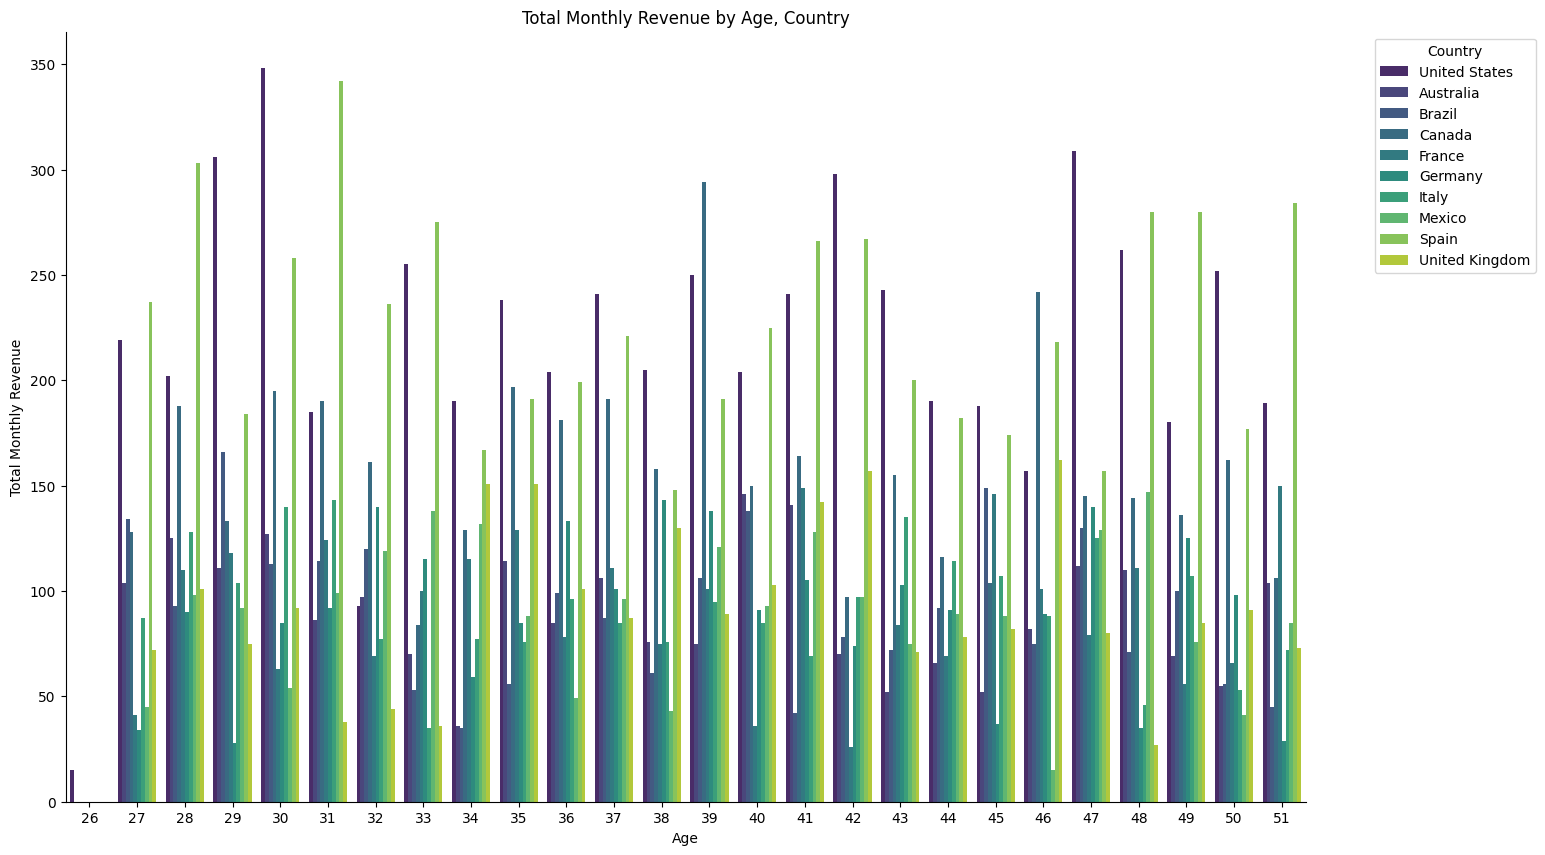

In [60]:
revenue_by_age_country_type = dataset.groupby(['Age', 'Country'])['Monthly Revenue'].sum().reset_index()

# Create the plot
plt.figure(figsize=(16, 10))
sns.barplot(data=revenue_by_age_country_type, x='Age', y='Monthly Revenue', hue='Country', palette='viridis', ci=None)
plt.title('Total Monthly Revenue by Age, Country')
plt.xlabel('Age')
plt.ylabel('Total Monthly Revenue')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.show()

## Summary

By analyzing the dataset, we identified that the archetype of a high-revenue user that produces the highest revenue, belongs to the age range around 30 years and lives in the United States. We could also say that the gender of this type of users is female but as the data is a little biased being the majority of users female, this shouldn't be considered a key factor.

This information is crucial for Netflix to develop targeted marketing strategies that optimize revenue and enhance user experience as well as to improve their business processes and to refine components of the company as the business model canvas and generate efficient operations.


# Business analysis:


**Corporate Success Factors**

Customer Satisfaction:
Understanding the distribution of subscription types and device preferences helps in tailoring services to enhance customer satisfaction.

Revenue Growth:
By analyzing which subscription types generate the most revenue, strategies can be developed to promote higher-tier subscriptions.

Market Penetration:
Analyzing demographic data helps in identifying potential markets and customizing marketing strategies to attract a diverse user base.

**Key Performance Indicators (KPIs)**

- Subscriber Growth Rate: Percentage increase in the number of subscribers over a specific period.
- Churn Rate: Percentage of users who cancel their subscriptions within a given timeframe.
- Average Revenue Per User (ARPU): Total revenue divided by the number of users.
- Active User Ratio: Ratio of active users to total users.
- Device Usage Statistics: Percentage of users accessing Netflix through different device types.



**Performance Metrics and Indicators**

  - Monthly Active Users (MAU): Number of unique users who have accessed Netflix at least once in the past month.
  - Subscription Renewal Rate: Percentage of users who renew their subscriptions after the plan duration ends.
  - Customer Lifetime Value (CLV): Total revenue expected from a user over the duration of their subscription.

**Business Motivations and Drivers**

* Customer Segmentation: Identifying high-value customers allows Netflix to tailor marketing efforts specifically to these segments, improving conversion rates and customer loyalty.

* Targeted Marketing: By understanding the characteristics of premium subscribers, Netflix can create personalized marketing campaigns that resonate more with this audience, leading to higher acquisition and retention rates.

* Revenue Optimization: Focusing on high-revenue segments helps in optimizing revenue streams, ensuring sustainable growth.
Impact of IoT/IoE

* Enhanced User Experience: IoT devices enable a seamless viewing experience across multiple devices, which is crucial for premium subscribers who often access content through Smart TVs and other high-end devices.

* Personalization: IoE allows Netflix to gather extensive data on viewing habits and preferences, facilitating highly personalized content recommendations.

* Operational Efficiency: IoT can help in predictive maintenance of network infrastructure, ensuring uninterrupted service for users, thus enhancing satisfaction and retention.

**Business Processes**

* Data-Driven Decision Making: Utilizing user data to make informed decisions about content acquisition, marketing strategies, and customer service improvements.

* Automated Systems: Implementing automated systems for subscription management, billing, and customer support to streamline operations and reduce costs.

* Feedback Loops: Creating feedback loops using customer data to continuously improve service offerings and user experience.

## Business Canvas

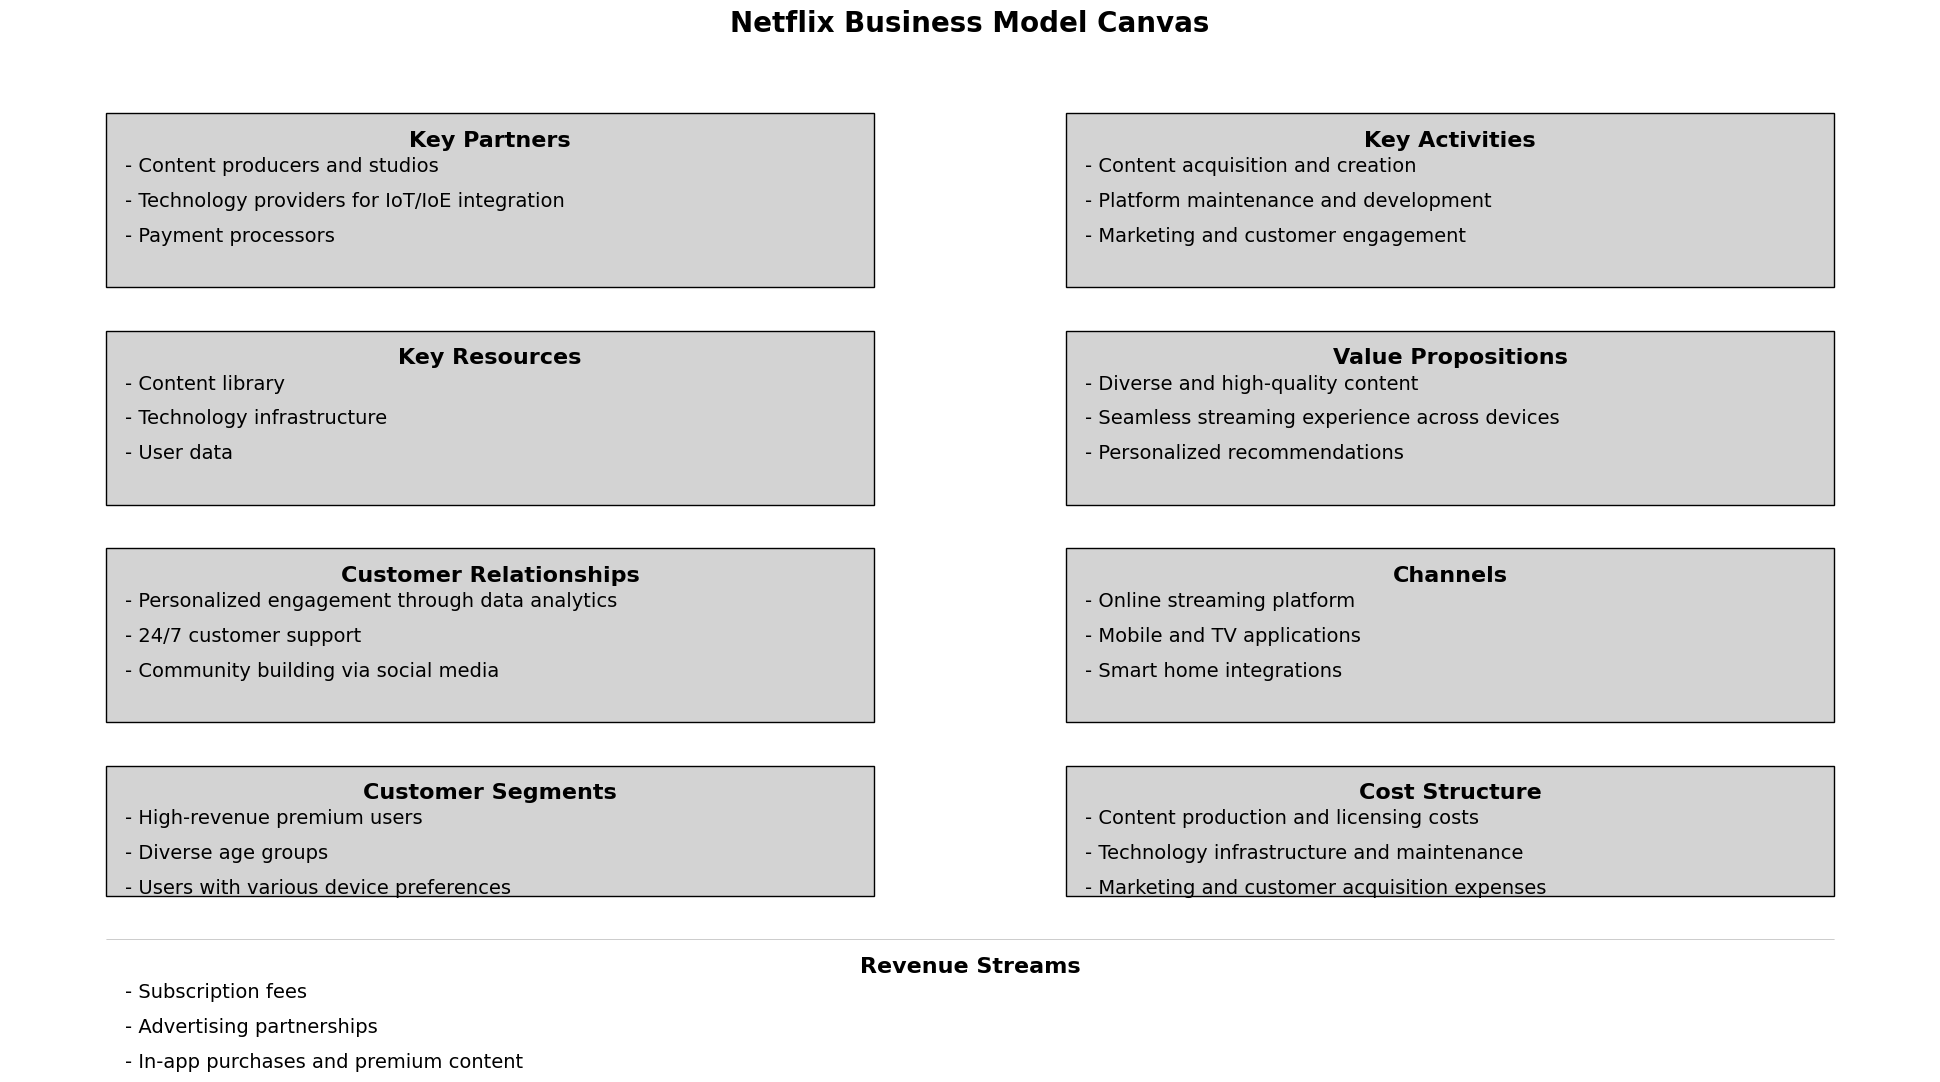

In [61]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Define the positions and sizes of the rectangles
canvas_data = [
    {'label': 'Key Partners', 'content': ['Content producers and studios', 'Technology providers for IoT/IoE integration', 'Payment processors'], 'x': 0.05, 'y': 0.75, 'width': 0.4, 'height': 0.2},
    {'label': 'Key Activities', 'content': ['Content acquisition and creation', 'Platform maintenance and development', 'Marketing and customer engagement'], 'x': 0.55, 'y': 0.75, 'width': 0.4, 'height': 0.2},
    {'label': 'Key Resources', 'content': ['Content library', 'Technology infrastructure', 'User data'], 'x': 0.05, 'y': 0.5, 'width': 0.4, 'height': 0.2},
    {'label': 'Value Propositions', 'content': ['Diverse and high-quality content', 'Seamless streaming experience across devices', 'Personalized recommendations'], 'x': 0.55, 'y': 0.5, 'width': 0.4, 'height': 0.2},
    {'label': 'Customer Relationships', 'content': ['Personalized engagement through data analytics', '24/7 customer support', 'Community building via social media'], 'x': 0.05, 'y': 0.25, 'width': 0.4, 'height': 0.2},
    {'label': 'Channels', 'content': ['Online streaming platform', 'Mobile and TV applications', 'Smart home integrations'], 'x': 0.55, 'y': 0.25, 'width': 0.4, 'height': 0.2},
    {'label': 'Customer Segments', 'content': ['High-revenue premium users', 'Diverse age groups', 'Users with various device preferences'], 'x': 0.05, 'y': 0.05, 'width': 0.4, 'height': 0.15},
    {'label': 'Cost Structure', 'content': ['Content production and licensing costs', 'Technology infrastructure and maintenance', 'Marketing and customer acquisition expenses'], 'x': 0.55, 'y': 0.05, 'width': 0.4, 'height': 0.15},
    {'label': 'Revenue Streams', 'content': ['Subscription fees', 'Advertising partnerships', 'In-app purchases and premium content'], 'x': 0.05, 'y': -0.15, 'width': 0.9, 'height': 0.15, 'color': 'lightblue'}
]

# Add rectangles and labels
for item in canvas_data:
    # Add rectangle with optional color
    rect = patches.Rectangle((item['x'], item['y']), item['width'], item['height'], linewidth=1, edgecolor='black', facecolor=item.get('color', 'lightgrey'))
    ax.add_patch(rect)

    # Add label
    plt.text(item['x'] + item['width']/2, item['y'] + item['height'] - 0.02, item['label'], ha='center', va='top', fontsize=16, fontweight='bold')

    # Add content with line spacing adjustments
    for i, content in enumerate(item['content']):
        plt.text(item['x'] + 0.01, item['y'] + item['height'] - 0.05 - i*0.04, f"- {content}", ha='left', va='top', fontsize=14)

# Remove axes
ax.set_axis_off()

# Set the title
plt.suptitle('Netflix Business Model Canvas', fontsize=20, fontweight='bold')

# Adjust the plot layout to fit all elements
plt.subplots_adjust(left=0.02, right=0.98, top=0.92, bottom=0.05)

# Show the plot
plt.show()

# References

* https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset/data
* https://pandas.pydata.org/docs/
* https://www.geeksforgeeks.org/how-to-convert-categorical-string-data-into-numeric-in-python/
* https://matplotlib.org/stable/index.html
* https://seaborn.pydata.org/
* https://numpy.org/doc/stable/index.html